In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [4]:
data=pd.read_excel('train_data.xlsx')

In [5]:
data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [7]:
data.describe()

,customer_id,transaction_date,cibil_score,total_no_of_acc,annual_inc,int_rate,loan_amnt,installment,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000,113705.000000
mean,4.359137e+07,2015-03-04 22:24:20.769535232,684.398707,0.272934,7.138822e+04,15.955469,15158.144980,454.241150,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,660.000000,0.000000,0.000000e+00,12.050000,1000.000000,33.240000,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,665.000000,0.000000,4.300000e+04,13.330000,8000.000000,265.740000,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,680.000000,0.000000,6.000000e+04,14.990000,13300.000000,388.290000,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,695.000000,0.000000,8.500000e+04,17.860000,20225.000000,599.530000,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,845.000000,10.000000,8.900060e+06,28.990000,40000.000000,1460.430000,875598.000000,11.000000,1.000000
std,2.016104e+07,NaN,22.871241,0.647328,6.050616e+04,3.234215,9091.279851,268.251678,20447.614824,4.229570,0.439239


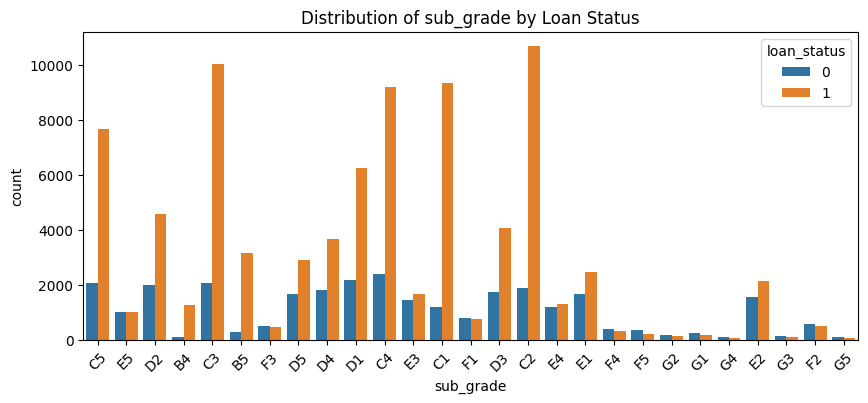

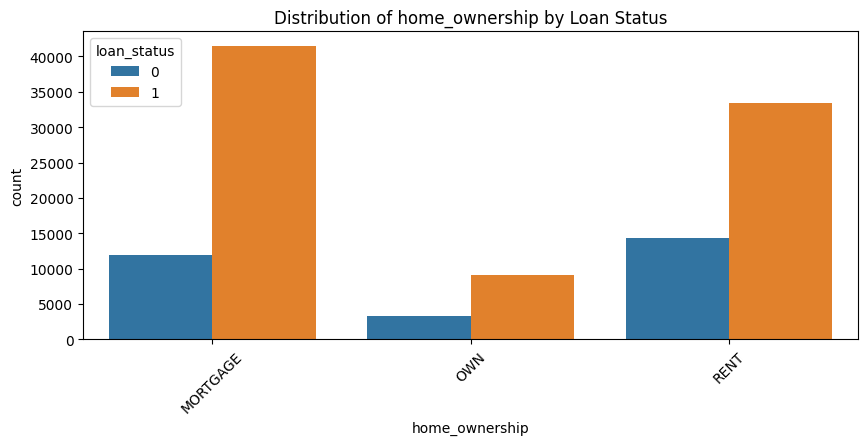

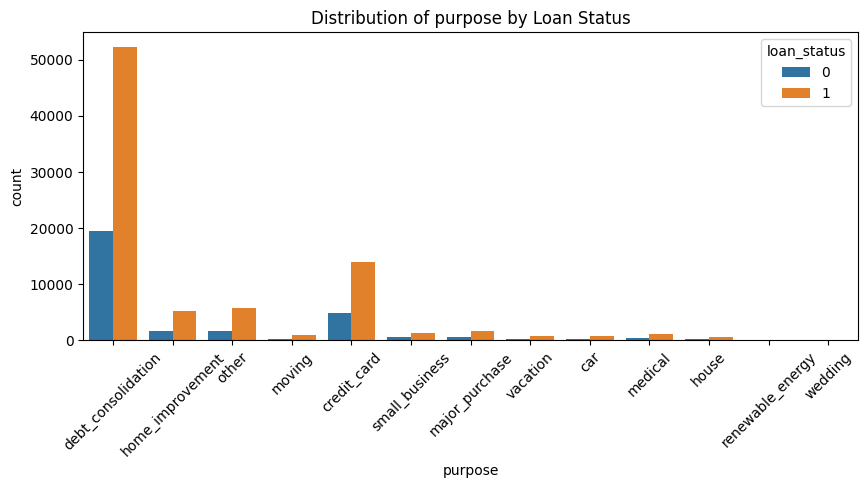

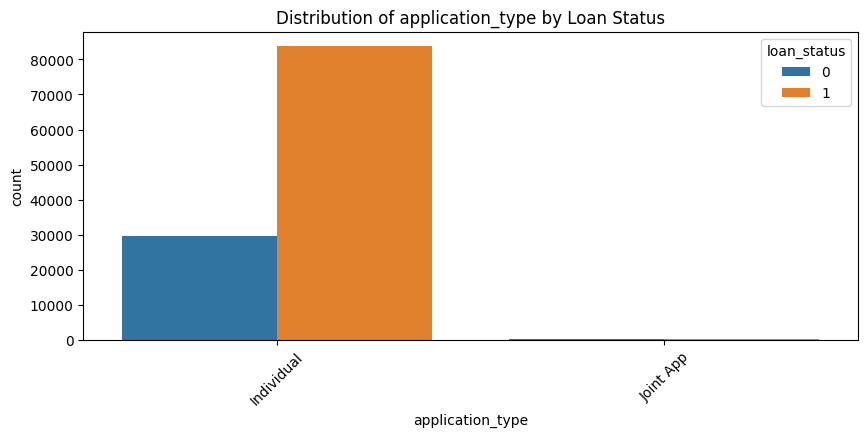

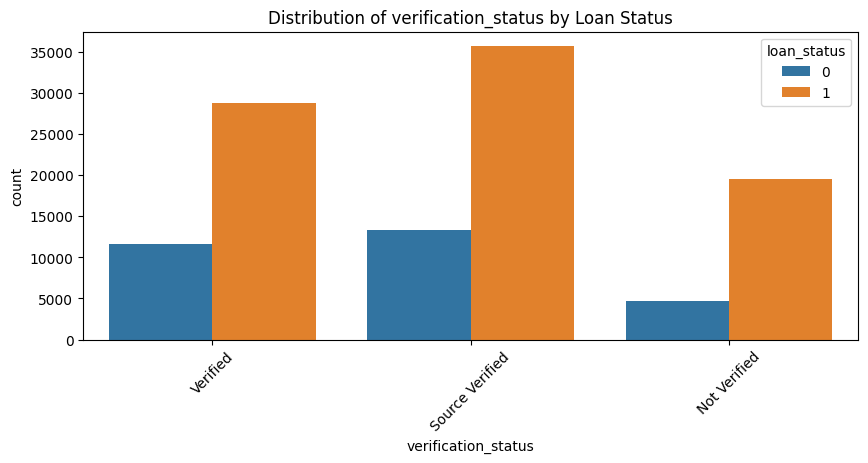

In [8]:
categorical_cols = ['sub_grade', 'home_ownership', 'purpose', 'application_type', 'verification_status']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=col, hue='loan_status')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

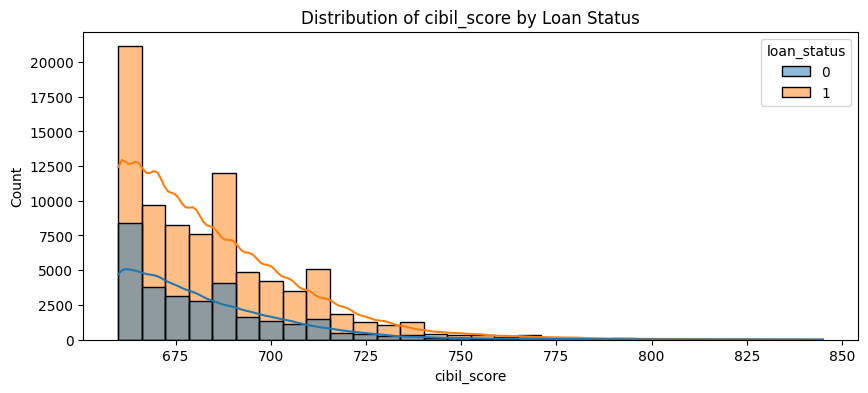

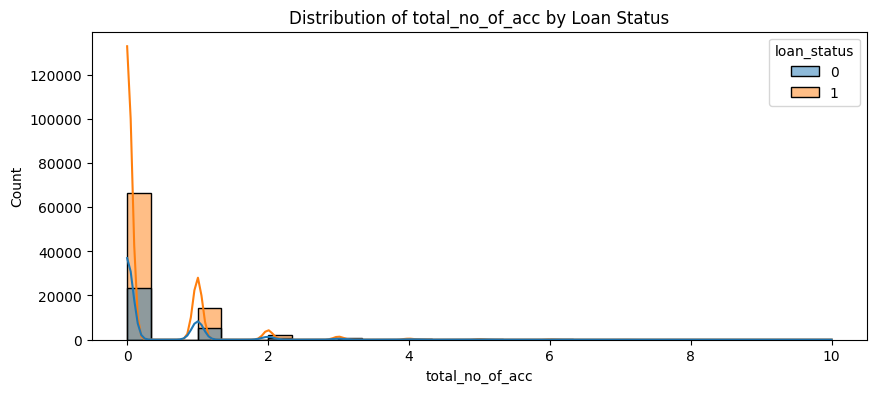

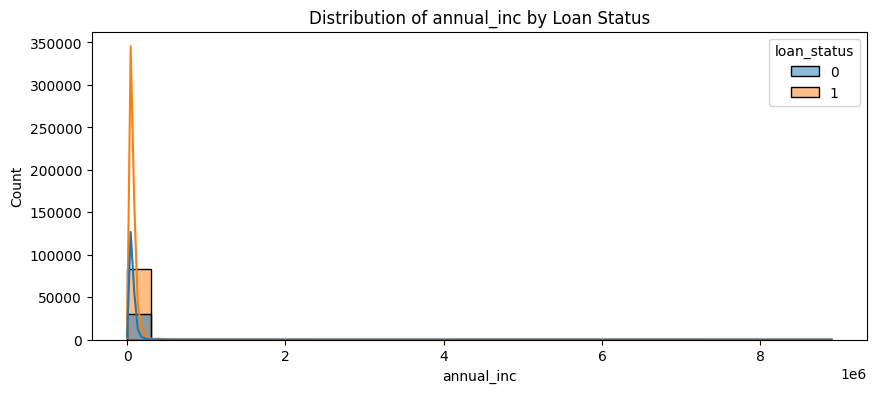

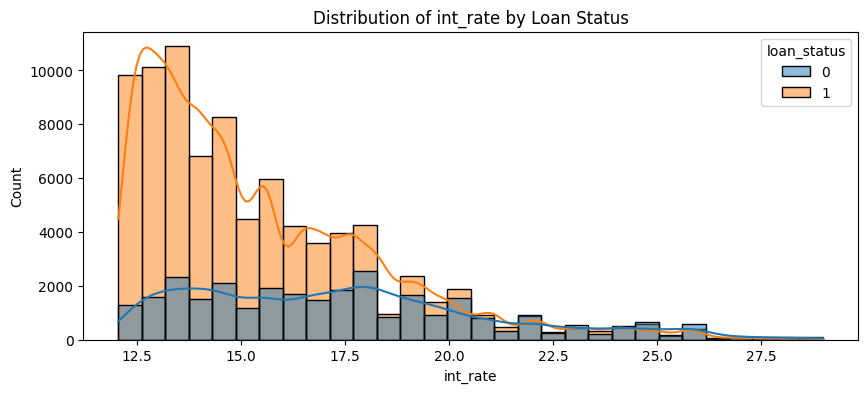

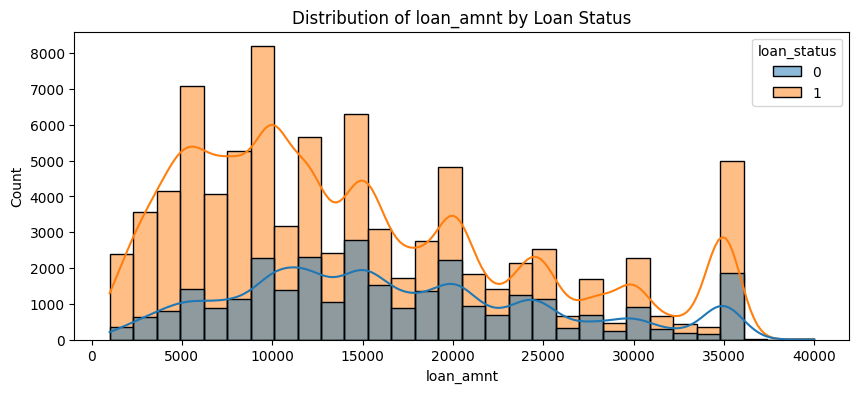

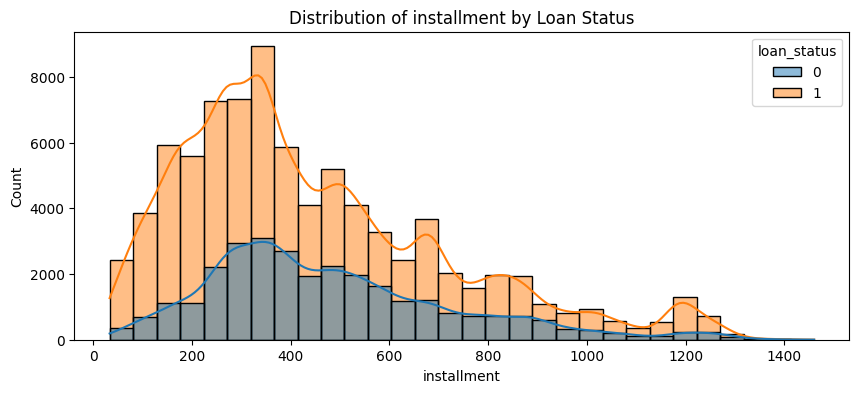

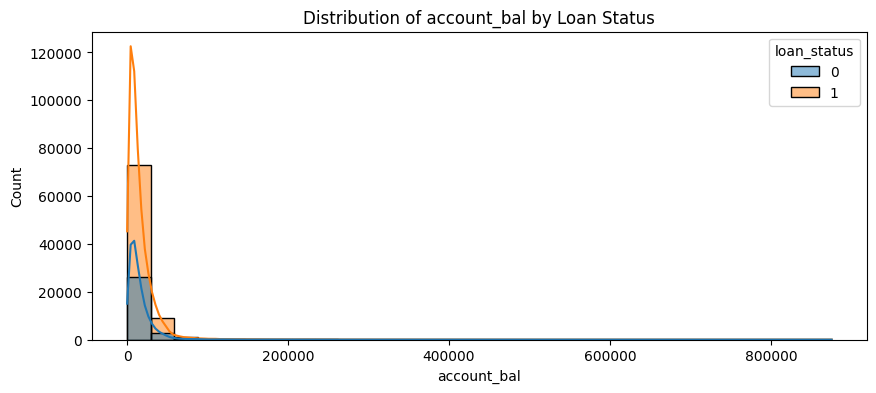

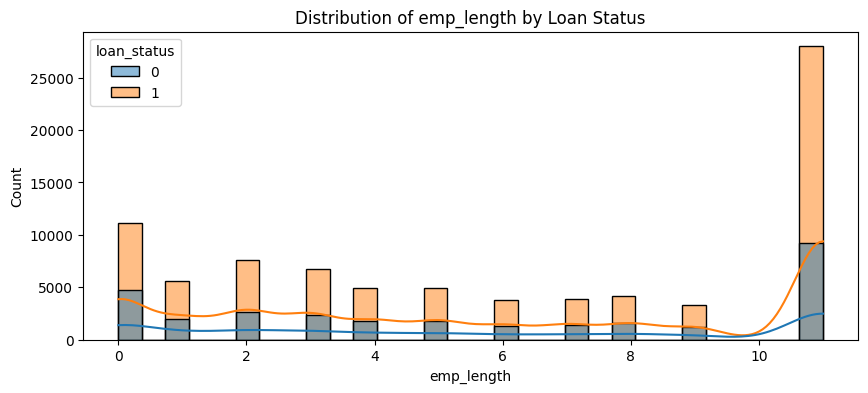

In [9]:
numerical_cols = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate',
                  'loan_amnt', 'installment', 'account_bal', 'emp_length']
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(data=data, x=col, hue='loan_status', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Loan Status')
    plt.show()

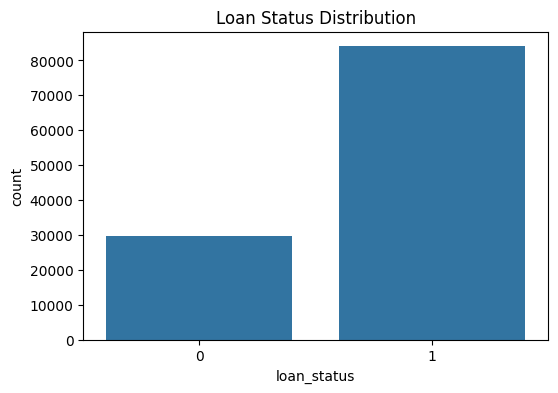

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='loan_status')
plt.title("Loan Status Distribution")
plt.show()

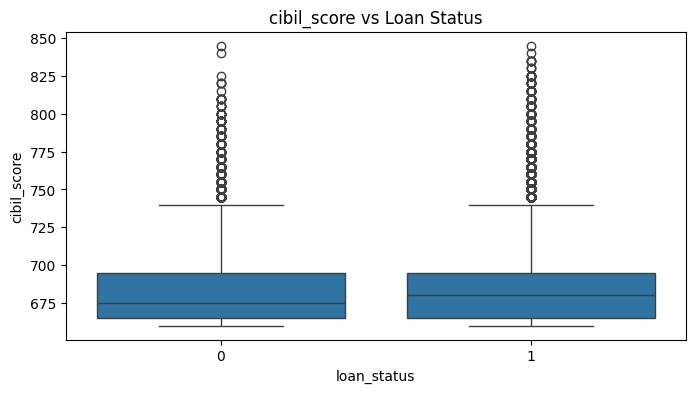

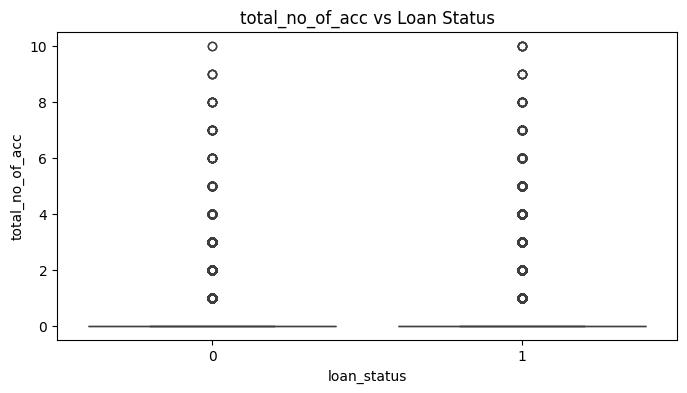

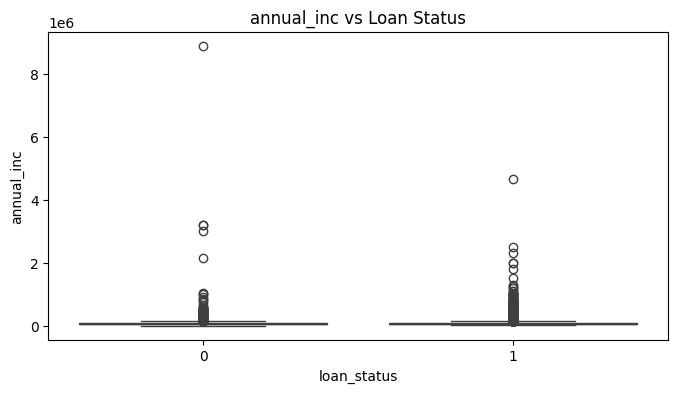

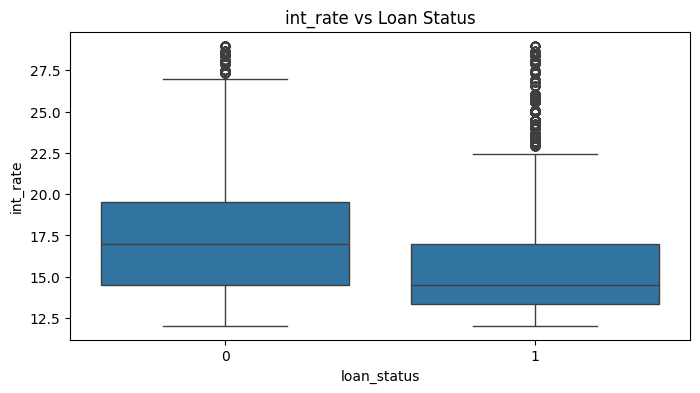

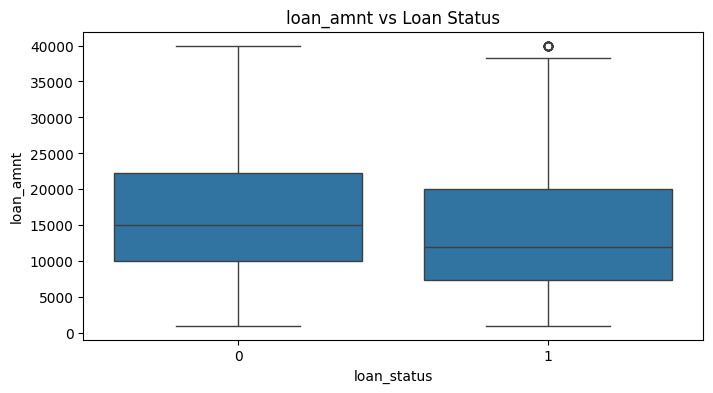

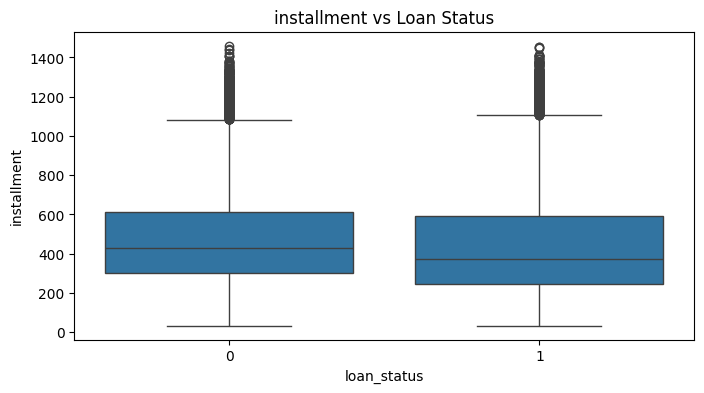

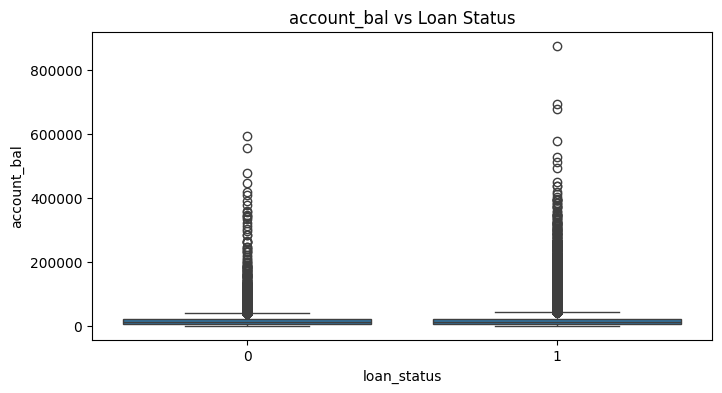

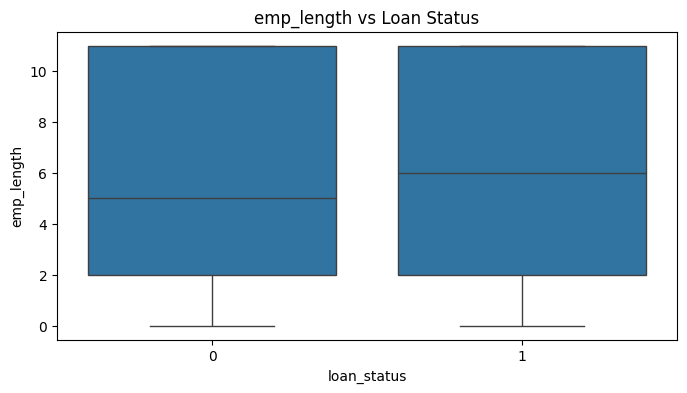

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='loan_status', y=col)
    plt.title(f"{col} vs Loan Status")
    plt.show()

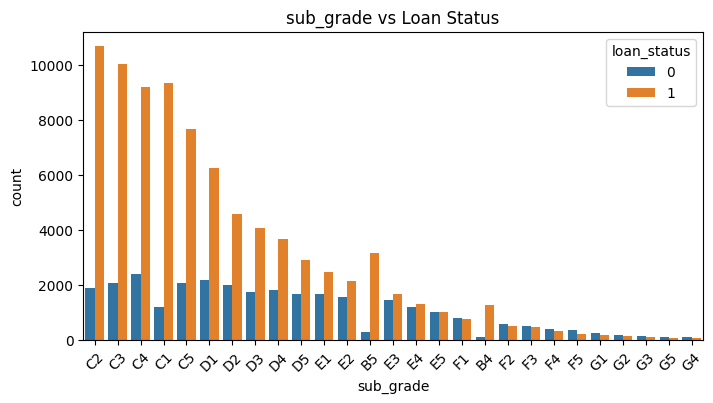

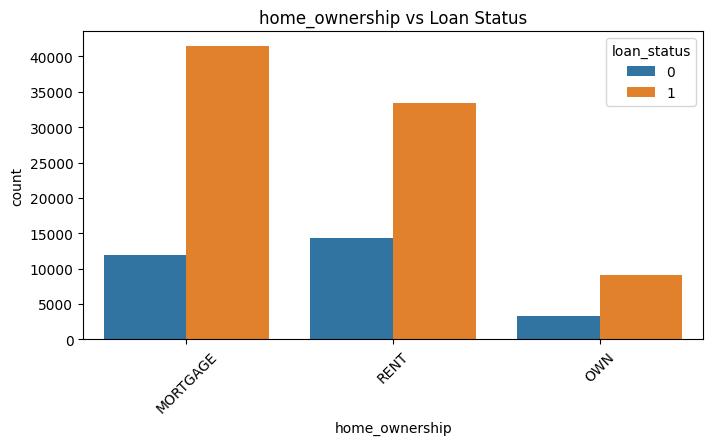

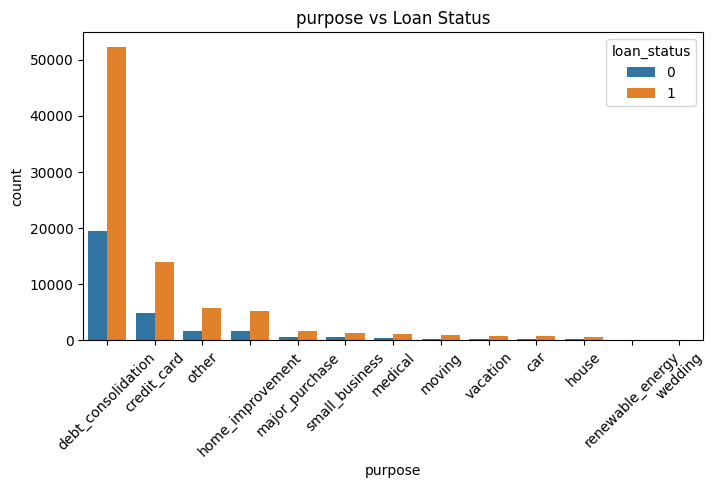

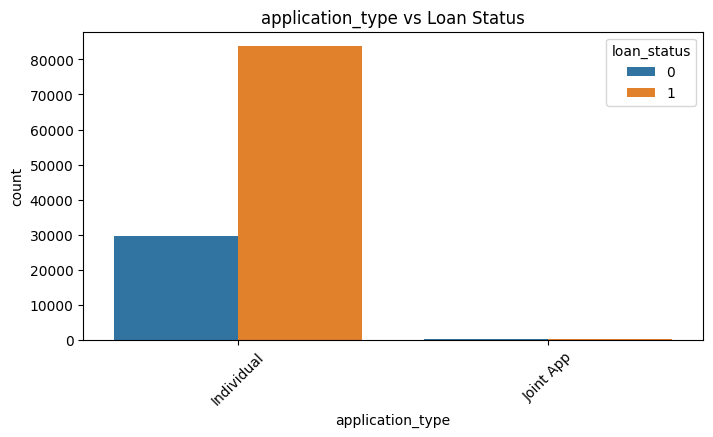

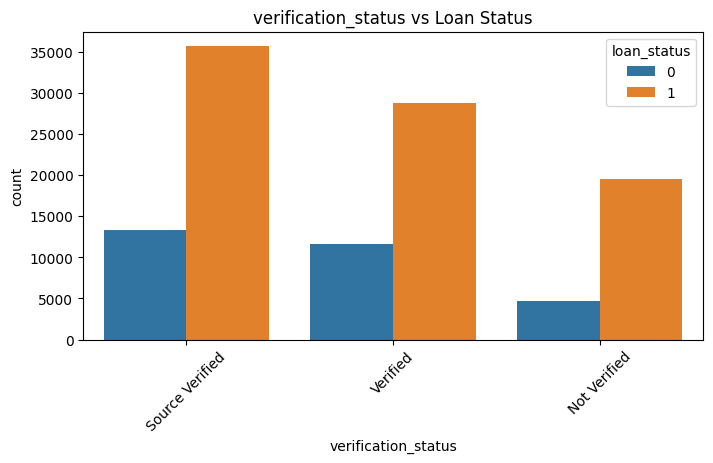

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='loan_status', order=data[col].value_counts().index)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Correlation Matrix
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_features].corr()
print(correlation_matrix)

                 customer_id  cibil_score  total_no_of_acc  annual_inc  \
customer_id         1.000000    -0.003837         0.008702    0.003201   
cibil_score        -0.003837     1.000000        -0.186116    0.051558   
total_no_of_acc     0.008702    -0.186116         1.000000    0.004760   
annual_inc          0.003201     0.051558         0.004760    1.000000   
int_rate           -0.000363    -0.108361         0.008189   -0.006163   
loan_amnt           0.030549     0.182999        -0.086091    0.381435   
installment         0.037582     0.126345        -0.069298    0.369989   
account_bal         0.015845     0.073834        -0.128041    0.302588   
emp_length         -0.033688     0.021581         0.011725    0.109719   
loan_status        -0.094431     0.053848        -0.008563    0.031050   

                 int_rate  loan_amnt  installment  account_bal  emp_length  \
customer_id     -0.000363   0.030549     0.037582     0.015845   -0.033688   
cibil_score     -0.108361   0

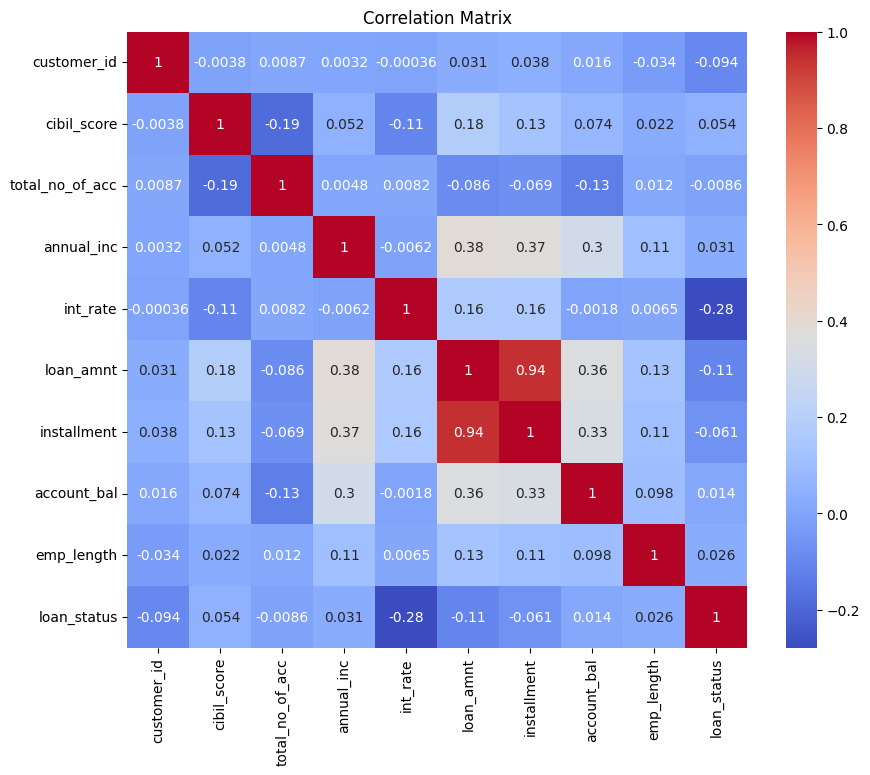

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [17]:
negative_corr = correlation_matrix['loan_status'][correlation_matrix['loan_status'] < 0]
print("Negative Correlations with loan_status:")
print(negative_corr)

Negative Correlations with loan_status:
customer_id       -0.094431
total_no_of_acc   -0.008563
int_rate          -0.278462
loan_amnt         -0.106371
installment       -0.060676
Name: loan_status, dtype: float64


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['annual_inc_normalized', 'loan_amnt_normalized']] = scaler.fit_transform(
    data[['annual_inc', 'loan_amnt']]
)

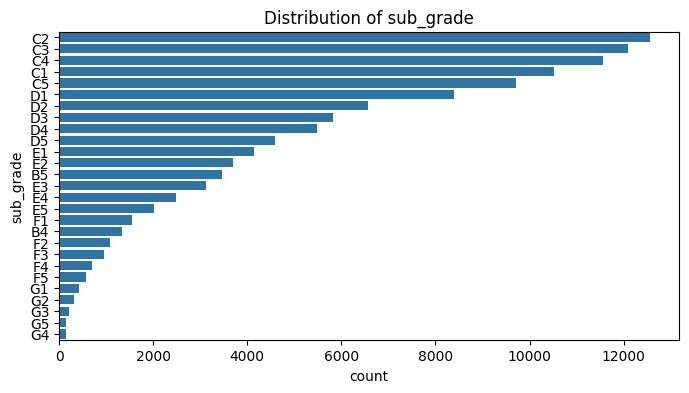

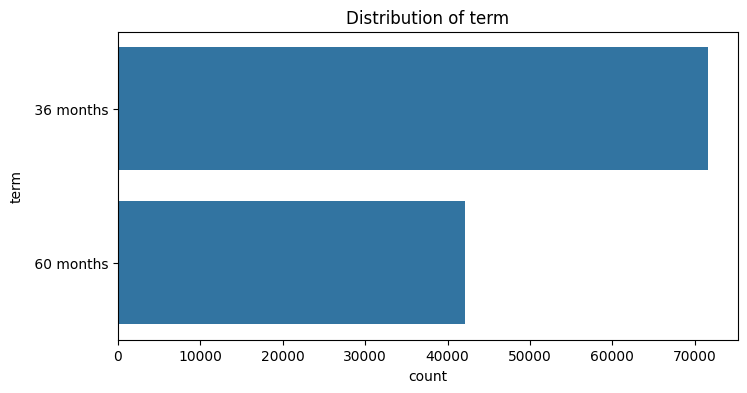

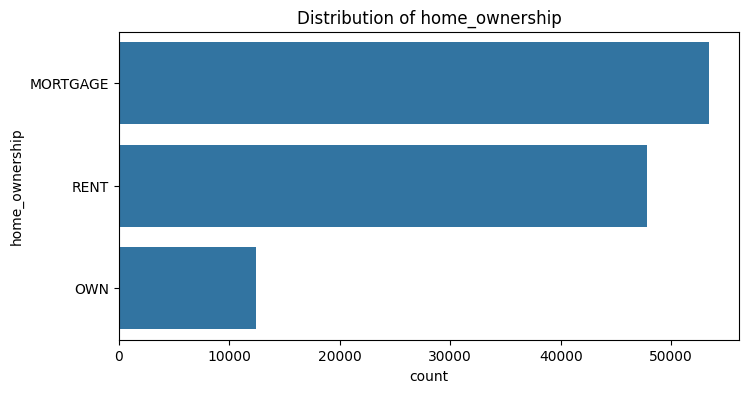

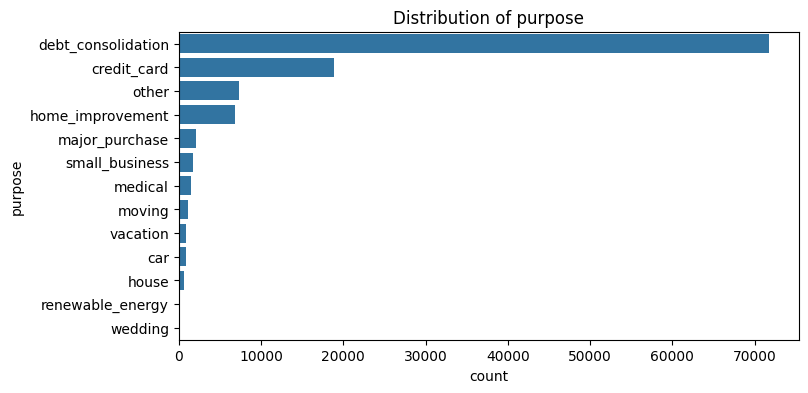

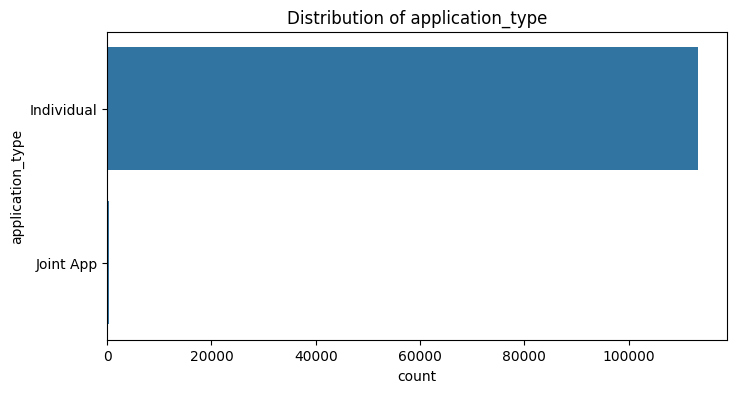

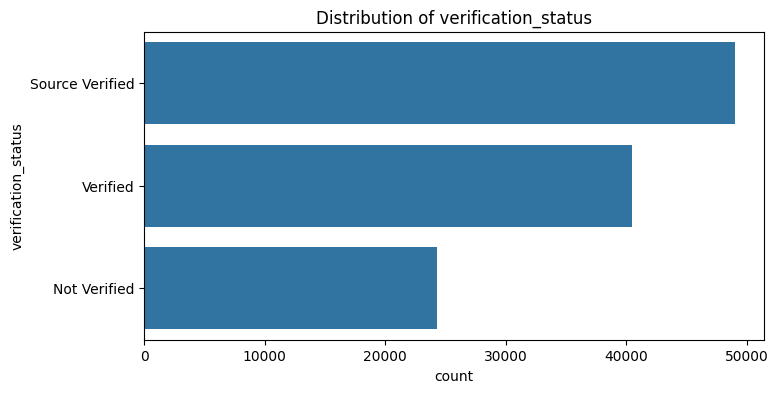

In [25]:
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

In [27]:
data.to_excel("normal_data_for_training.xlsx", index=False)